In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
nft = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Top%20NFT%20Collections/NFT_Top_Collections.csv")

In [3]:
nft.head()

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.91560,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659.23392,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288.38880,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254.17550,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225.30000,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...


In [4]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              592 non-null    int64  
 1   Name               592 non-null    object 
 2   Volume             592 non-null    float64
 3   Volume_USD         592 non-null    float64
 4   Market_Cap         592 non-null    float64
 5   Market_Cap_USD     592 non-null    float64
 6   Sales              592 non-null    int64  
 7   Floor_Price        544 non-null    float64
 8   Floor_Price_USD    544 non-null    float64
 9   Average_Price      592 non-null    float64
 10  Average_Price_USD  592 non-null    float64
 11  Owners             592 non-null    int64  
 12  Assets             592 non-null    int64  
 13  Owner_Asset_Ratio  543 non-null    float64
 14  Category           310 non-null    object 
 15  Website            481 non-null    object 
 16  Logo               591 non

In [5]:
nft.drop(columns = ["Category","Website","Logo"],inplace = True)
nft.dropna(inplace=True)
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 591
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              540 non-null    int64  
 1   Name               540 non-null    object 
 2   Volume             540 non-null    float64
 3   Volume_USD         540 non-null    float64
 4   Market_Cap         540 non-null    float64
 5   Market_Cap_USD     540 non-null    float64
 6   Sales              540 non-null    int64  
 7   Floor_Price        540 non-null    float64
 8   Floor_Price_USD    540 non-null    float64
 9   Average_Price      540 non-null    float64
 10  Average_Price_USD  540 non-null    float64
 11  Owners             540 non-null    int64  
 12  Assets             540 non-null    int64  
 13  Owner_Asset_Ratio  540 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 63.3+ KB


In [6]:
nft["Market_Cap_USD"] = nft["Market_Cap_USD"]/nft["Market_Cap_USD"].max()
nft["Volume_USD"] = nft["Volume_USD"]/nft["Volume_USD"].max()

In [7]:
nft.corr()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
Index,1.000000,-0.234445,-0.234445,-0.331022,-0.331022,-0.416273,-0.033973,-0.033973,-0.208543,-0.208543,-0.315575,-0.320982,-0.180560
Volume,-0.234445,1.000000,1.000000,0.356271,0.356271,0.238439,0.069615,0.069615,0.605738,0.605738,0.144694,0.126606,0.066704
Volume_USD,-0.234445,1.000000,1.000000,0.356271,0.356271,0.238439,0.069615,0.069615,0.605738,0.605738,0.144694,0.126606,0.066704
Market_Cap,-0.331022,0.356271,0.356271,1.000000,1.000000,0.400295,-0.009540,-0.009540,0.110256,0.110256,0.414119,0.535009,-0.094358
Market_Cap_USD,-0.331022,0.356271,0.356271,1.000000,1.000000,0.400295,-0.009540,-0.009540,0.110256,0.110256,0.414119,0.535009,-0.094358
Sales,-0.416273,0.238439,0.238439,0.400295,0.400295,1.000000,-0.034665,-0.034665,-0.034781,-0.034781,0.810149,0.751806,0.028560
Floor_Price,-0.033973,0.069615,0.069615,-0.009540,-0.009540,-0.034665,1.000000,1.000000,0.207361,0.207361,-0.044679,-0.052571,0.092825
Floor_Price_USD,-0.033973,0.069615,0.069615,-0.009540,-0.009540,-0.034665,1.000000,1.000000,0.207361,0.207361,-0.044679,-0.052571,0.092825
Average_Price,-0.208543,0.605738,0.605738,0.110256,0.110256,-0.034781,0.207361,0.207361,1.000000,1.000000,-0.069190,-0.084522,0.086463
Average_Price_USD,-0.208543,0.605738,0.605738,0.110256,0.110256,-0.034781,0.207361,0.207361,1.000000,1.000000,-0.069190,-0.084522,0.086463


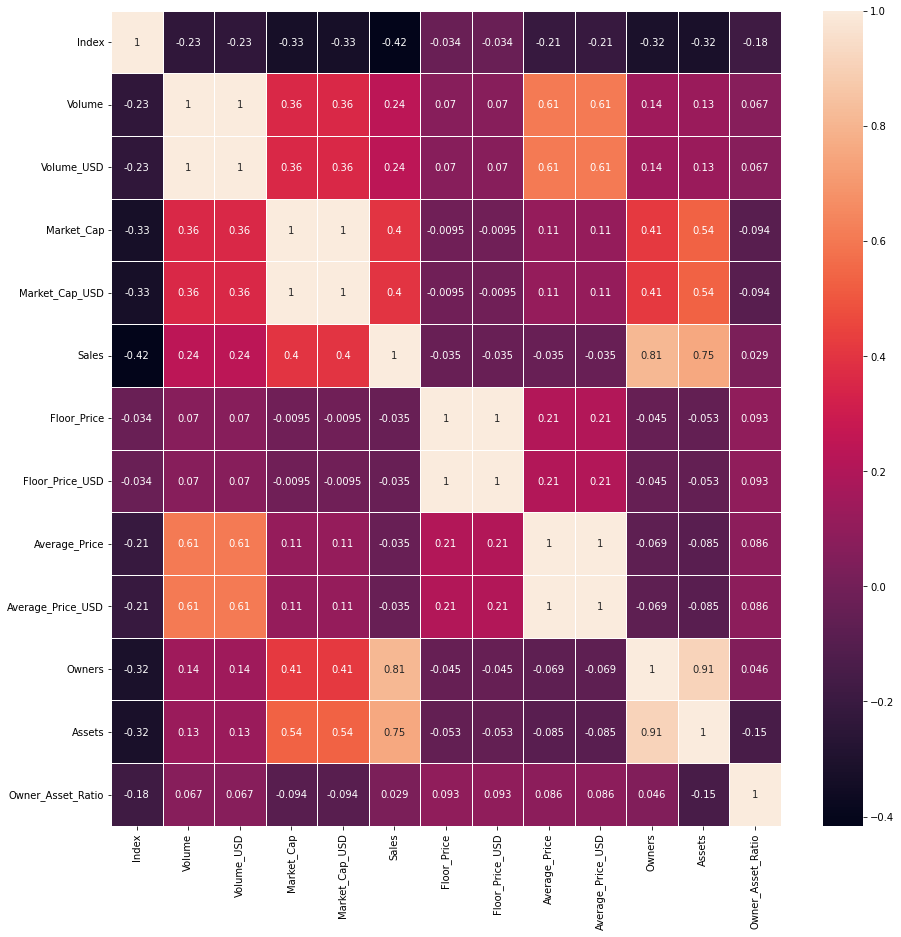

In [8]:
plt.subplots(figsize=(15,15))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [9]:
nft.describe()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,297.838889,207.516556,0.007613,49.455651,0.019541,177.403704,2.437130,357.819372,1.617846,237.532201,58.761111,127.714815,54.224852
std,172.801027,1342.088058,0.049239,187.209992,0.073970,470.371171,19.051702,2797.170904,4.868120,714.737314,139.157205,260.802828,27.568784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,2.936400,0.000000,0.000000,1.000000,1.000000,0.260000
25%,149.750000,7.187500,0.000264,0.000000,0.000000,13.000000,0.110000,16.150200,0.284943,41.835335,6.000000,15.000000,33.330000
50%,296.500000,18.545000,0.000680,0.180625,0.000071,37.000000,0.300000,44.046000,0.653049,95.880622,19.000000,44.000000,57.195000
75%,447.250000,78.257500,0.002871,24.753000,0.009780,120.500000,1.000000,146.820000,1.387940,203.777320,48.000000,114.250000,72.740000
max,599.000000,27256.630000,1.000000,2530.877143,1.000000,5229.000000,400.000000,58728.000000,74.471667,10933.930100,2041.000000,3320.000000,100.000000


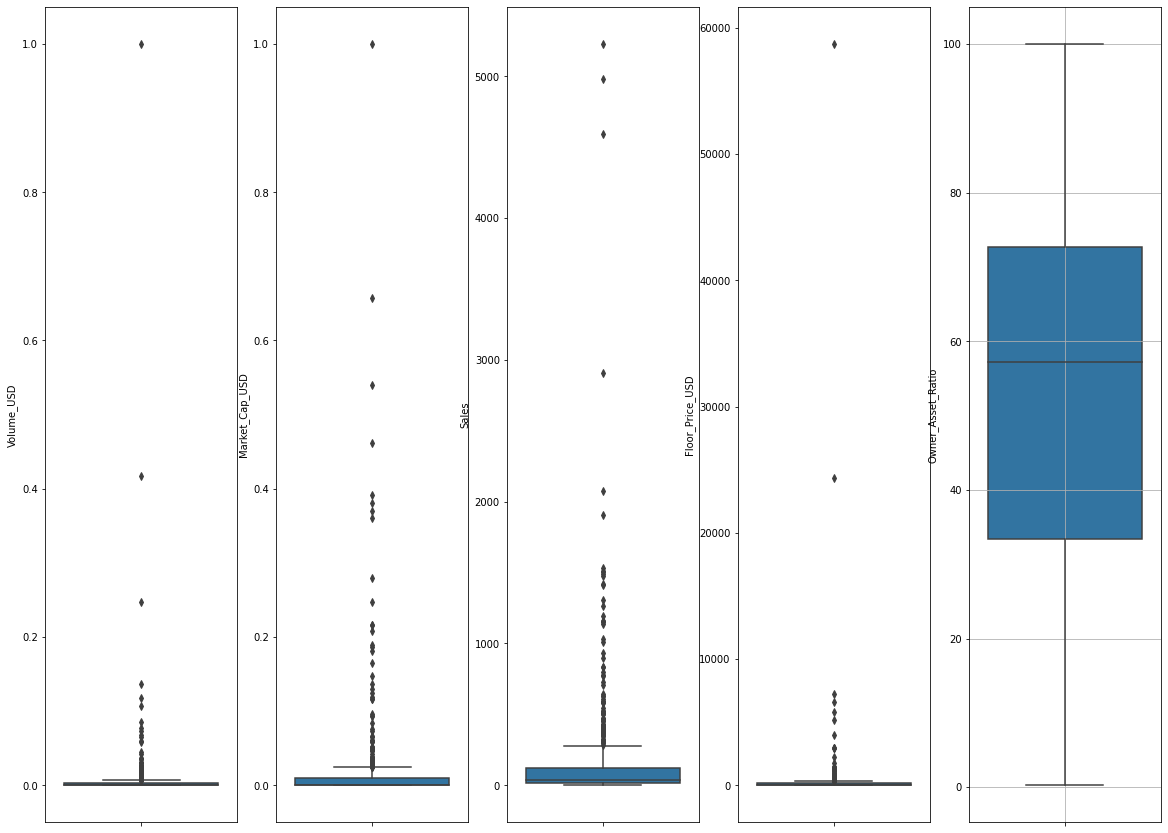

In [10]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Volume_USD ,data = nft,ax = ax[0])
sns.boxplot(y =nft.Market_Cap_USD ,data = nft,ax = ax[1])
sns.boxplot(y =nft.Sales ,data = nft,ax = ax[2])
sns.boxplot(y =nft.Floor_Price_USD,data = nft,ax = ax[3])
sns.boxplot(y =nft.Owner_Asset_Ratio ,data = nft,ax = ax[4])
plt.grid(True)
plt.show()

In [11]:
new_index = nft.Owner_Asset_Ratio.sort_values(ascending = False).index.values
sorted_nft = nft.reindex(new_index)
sorted_nft.index = range(0,540)
top_nft = sorted_nft.loc[0:100]
top_nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,366,Solana Monkey University,12.27,0.000450,0.000000,0.000000,11,2.49,365.5818,1.115455,163.771036,1,1,100.00
1,51,Piggy Sol Gang,340.08,0.012477,33.950000,0.013414,52,3.50,513.8700,6.540000,960.202800,15,15,100.00
2,202,I CAN WRITE NEAT,41.60,0.001526,0.000000,0.000000,13,20.00,2936.4000,3.200000,469.824000,1,1,100.00
3,549,Solanum Nigrum,4.50,0.000165,0.000000,0.000000,18,1.00,146.8200,0.250000,36.705000,2,2,100.00
4,389,Proto Pass,10.87,0.000399,0.836154,0.000330,13,1.20,176.1840,0.836154,122.764108,1,1,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,444,Solanian Artifacts,7.30,0.000268,0.000000,0.000000,13,0.05,7.3410,0.561538,82.445077,4,5,80.00
97,537,Flappyz,4.88,0.000179,8.133333,0.003214,3,0.99,145.3518,1.626667,238.827200,4,5,80.00
98,316,Goblin Laboratory,16.60,0.000609,0.000000,0.000000,4,0.90,132.1380,4.150000,609.303000,8,10,80.00
99,347,Rogue Sharks™ NFT,13.99,0.000513,0.000000,0.000000,5,0.50,73.4100,2.798000,410.802360,4,5,80.00


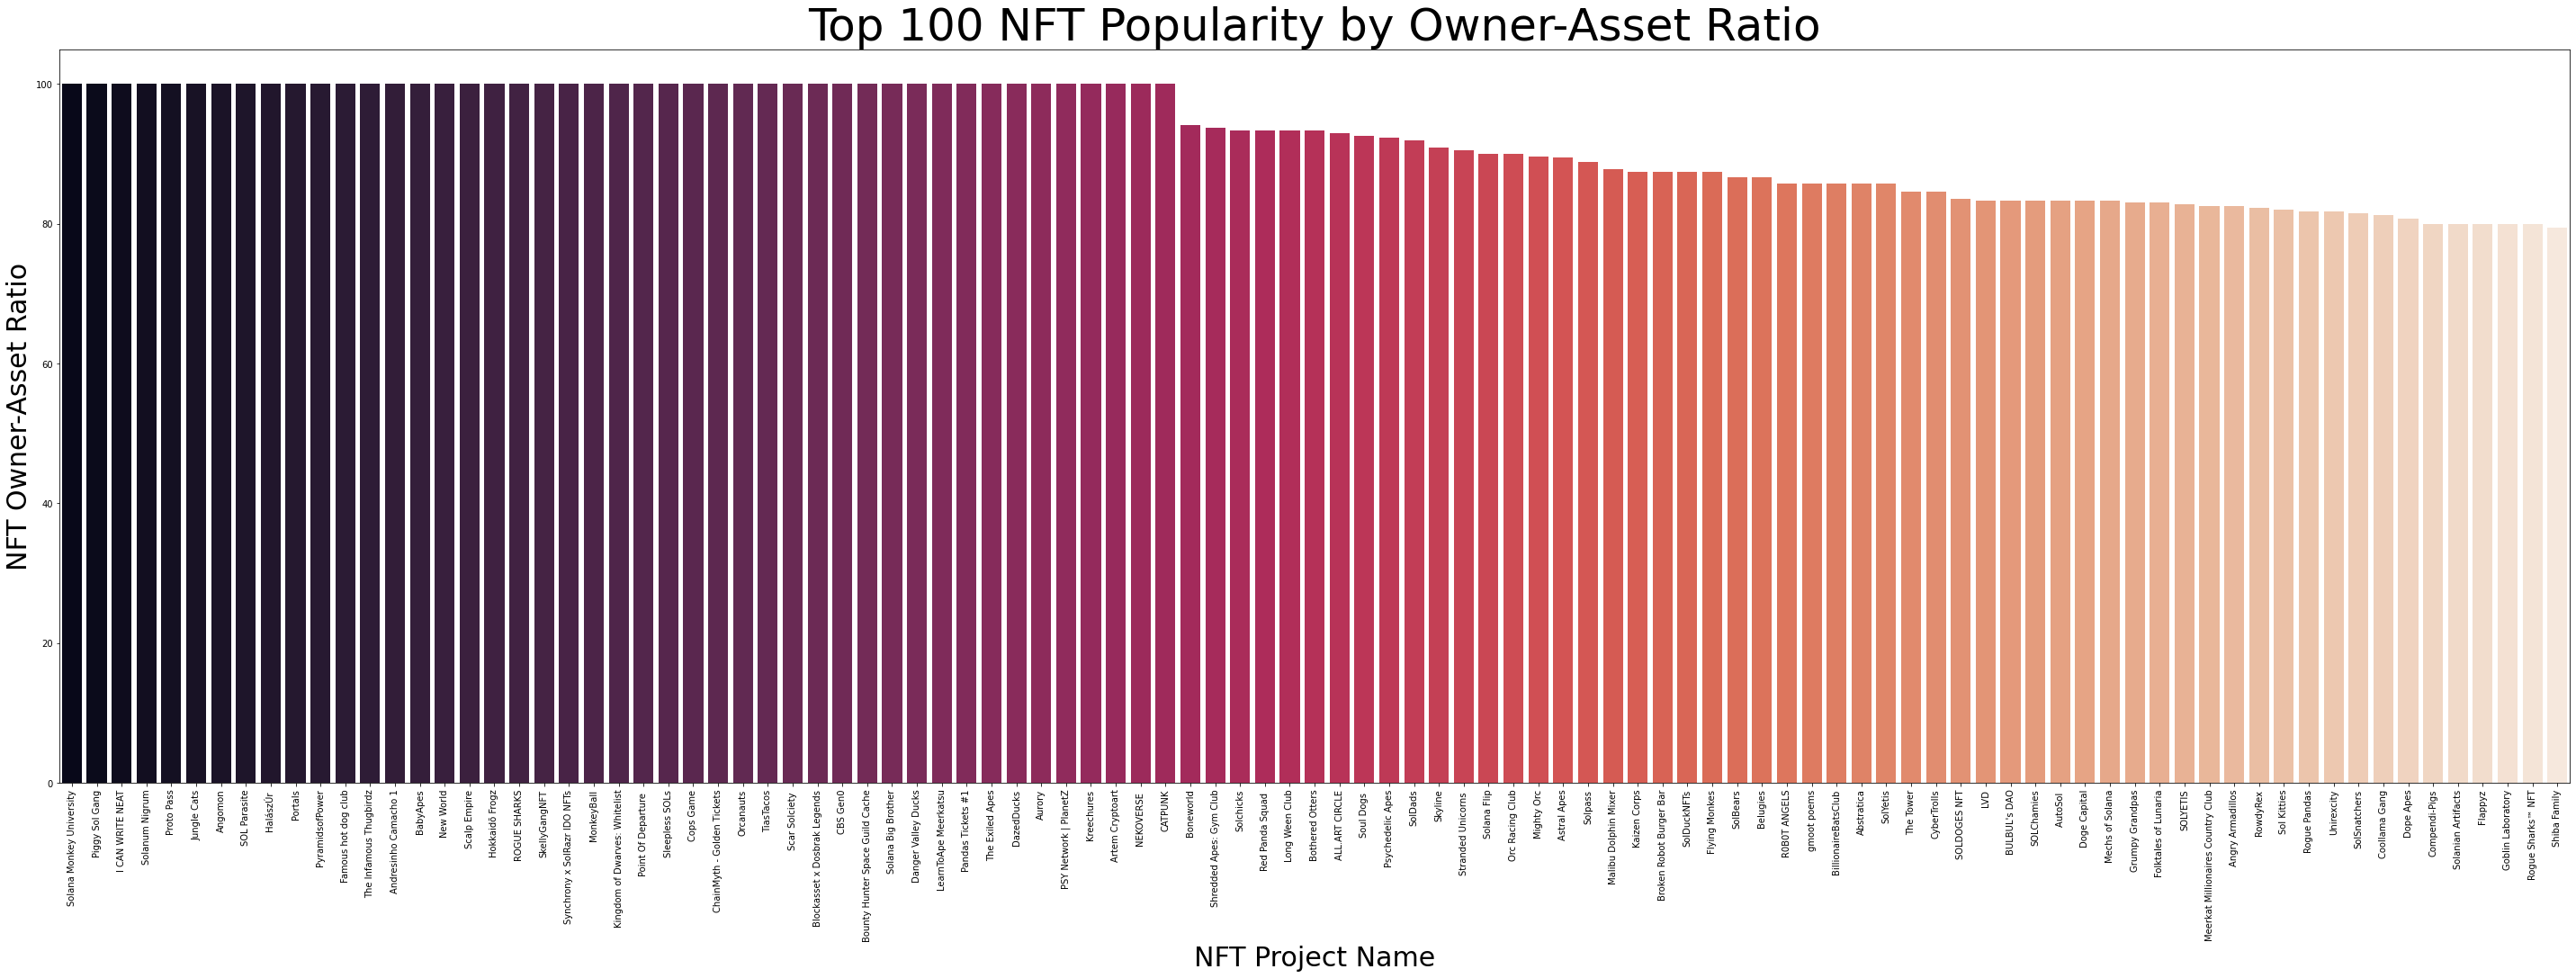

In [12]:
plt.subplots(figsize=(50,15))
sns.barplot(x=top_nft.Name,y=top_nft.Owner_Asset_Ratio.sort_values(),palette = "rocket")
plt.xticks(rotation = 90)
plt.xlabel("NFT Project Name",fontsize =30)
plt.ylabel("NFT Owner-Asset Ratio",fontsize =30)
plt.title("Top 100 NFT Popularity by Owner-Asset Ratio",fontsize =50)
plt.show()

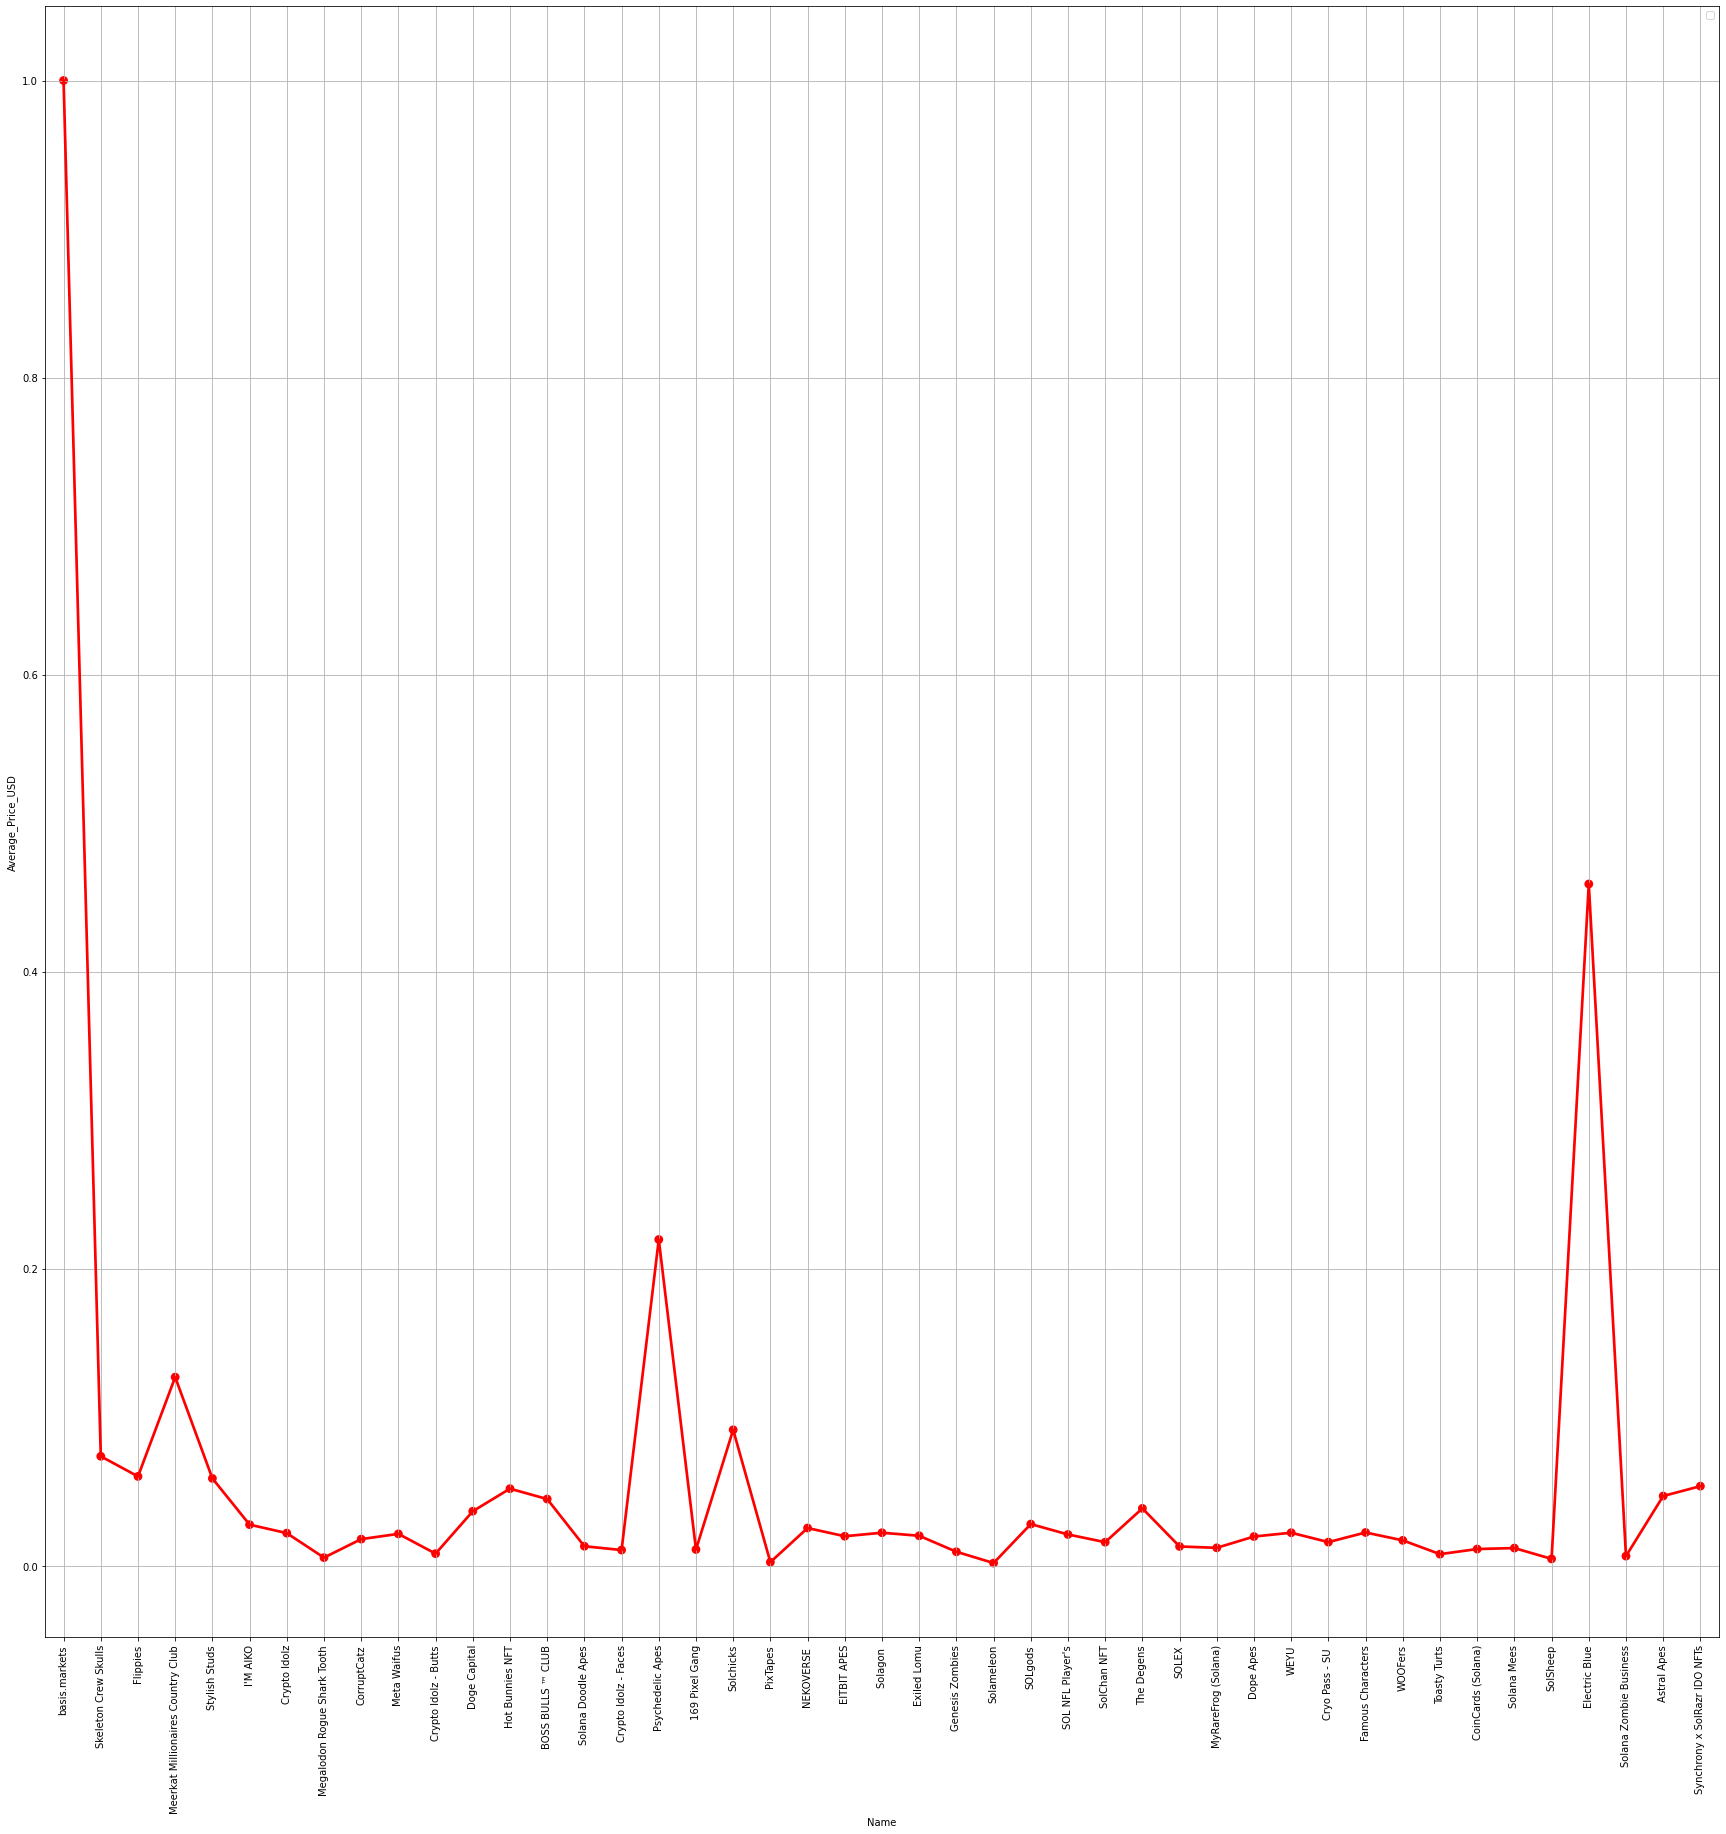

In [13]:
av_price_index = nft.Average_Price_USD.sort_values(ascending = False).index.values
floor_price_index = nft.Floor_Price_USD.sort_values(ascending = False).index.values
av_price_data = nft.reindex(av_price_index)
floor_price_data = nft.reindex(floor_price_index)
av_price_data.Average_Price_USD = av_price_data.Average_Price_USD/max(av_price_data.Average_Price_USD)
floor_price_data.Floor_Price_USD = floor_price_data.Floor_Price_USD/max(floor_price_data.Floor_Price_USD)
av_price_data = av_price_data.reindex(range(0,50))
floor_price_data = floor_price_data.reindex(range(0,50))
av_price_data = av_price_data.iloc[0:50]
floor_price_data = floor_price_data.iloc[0:50]
plt.subplots(figsize=(30,30))
sns.pointplot(x = "Name",y="Average_Price_USD",data =av_price_data,color="red" )
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()